<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas
pandas.__version__

'0.24.2'

In [0]:
import pandas as pd
pd?

#Introducing Pandas Objects

##The Pandas Series Object

In [0]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [0]:
print(data.values)
print(data.index)

[0.25 0.5  0.75 1.  ]
RangeIndex(start=0, stop=4, step=1)


In [0]:
print(data[1])
print(data[1:3])

0.5
1    0.50
2    0.75
dtype: float64


In [0]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
index=['a', 'b', 'c', 'd'])
print(data)
print(data['b'])

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5


In [0]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
index=[2, 5, 3, 7])
print(data)
print(data[5])

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64
0.5


In [0]:
population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [0]:
population['California']

38332521

In [0]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [0]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [0]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [0]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [0]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

##The Pandas DataFrame Object

In [0]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [0]:
states = pd.DataFrame({'population': population, 'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [0]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [0]:
states.columns

Index(['population', 'area'], dtype='object')

In [0]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [0]:
# From a single Series object.
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [0]:
# From a list of dicts.
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [0]:
# From a list of dicts with MISSING data
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [0]:
# From a dictionary of Series objects.
pd.DataFrame({'population': population, 'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [0]:
# From a two-dimensional NumPy array.
import numpy as np
pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'], index=['a', 'b', 'c'])

,foo,bar
a,0.420290,0.971120
b,0.517206,0.697154
c,0.269252,0.284516


In [0]:
# From a NumPy structured array.
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


##The Pandas Index Object

In [0]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [0]:
ind[1]

3

In [0]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [0]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [0]:
print("index is IMMUTABLE, ERROR should be generated")
ind[1] = 0

index is IMMUTABLE, ERROR should be generated


TypeError: ignored

In [0]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
print(indA & indB) # intersection
print(indA | indB) # union
print(indA ^ indB) # symmetric difference

Int64Index([3, 5, 7], dtype='int64')
Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
Int64Index([1, 2, 9, 11], dtype='int64')


#Data Indexing and Selection

##Data Selection in Series

In [0]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [0]:
data['b']

0.5

In [0]:
'a' in data

True

In [0]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [0]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [0]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [0]:
# slicing by explicit index
# final index is included in the slice
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [0]:
# slicing by implicit integer index
# final index is excluded from the slice
data[0:2]

a    0.25
b    0.50
dtype: float64

In [0]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [0]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [0]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [0]:
# explicit index when indexing
data[1]

'a'

In [0]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

In [0]:
# always references the explicit index
print(data.loc[1])
print(data.loc[1:3])

a
1    a
3    b
dtype: object


In [0]:
# always references the implicit index
print(data.iloc[1])
print(data.iloc[1:3])

b
3    b
5    c
dtype: object


##Data Selection in DataFrame

In [0]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [0]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [0]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [0]:
data.area is data['area']

True

In [0]:
data.pop is data['pop'] # conflicts with pop() method of DataFrame

False

In [0]:
data['density'] = data['pop'] / data['area'] # adding new column + elementwise operations
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [0]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [0]:
data.T # transpose

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [0]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [0]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [0]:
data.iloc[:3, :2] # implicit indexing

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [0]:
data.loc[:'Illinois', :'pop'] # explicit indexing

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [0]:
data.loc[data.density > 100, ['pop', 'density']] # fancy indexing + masking

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [0]:
data.iloc[0, 2] = 90 # modification
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [0]:
# while indexing refers to columns, slicing and masking refer to rows
print(data['Florida':'Illinois'])
print(data[1:3])
print(data[data.density > 100])

            area       pop     density
Florida   170312  19552860  114.806121
Illinois  149995  12882135   85.883763
            area       pop     density
Texas     695662  26448193   38.018740
New York  141297  19651127  139.076746
            area       pop     density
New York  141297  19651127  139.076746
Florida   170312  19552860  114.806121


#Operating on Data in Pandas

##Ufuncs: Index Preservation

In [0]:
import pandas as pd
import numpy as np

rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
print(ser, '\n')

df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
columns=['A', 'B', 'C', 'D'])
print(df)

0    6
1    3
2    7
3    4
dtype: int64 

   A  B  C  D
0  6  9  2  6
1  7  4  3  7
2  7  2  5  4


In [0]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [0]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


##UFuncs: Index Alignment

In [0]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662, 'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127}, name='population')

In [0]:
population / area # missing data is correctly handled (idexes merged)

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [0]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [0]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B # NaN for missing operands

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [0]:
A.add(B, fill_value=0) # treat missing vals as zeros

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [0]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns=list('AB'))
print(A, '\n\n')
B = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns=list('BAC'))
print(B, '\n\n')
A + B

   A   B
0  1  11
1  5   1 


   B  A  C
0  4  0  9
1  5  8  0
2  9  2  6 




,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [0]:
fill = A.stack().mean() # fill missing data with mean value in A
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


##Ufuncs: Operations Between DataFrame and Series

In [0]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [0]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [0]:
df = pd.DataFrame(A, columns=list('QRST')) # broadcasting (row-wise)
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [0]:
df.subtract(df['R'], axis=0) # broadcasting (column-wise)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [0]:
halfrow = df.iloc[0, ::2]
print(halfrow, '\n\n')
print(df - halfrow) # auto-alignment

Q    3
S    2
Name: 0, dtype: int64 


     Q   R    S   T
0  0.0 NaN  0.0 NaN
1 -1.0 NaN  2.0 NaN
2  3.0 NaN  1.0 NaN


#Handling Missing Data

##Missing Data in Pandas

In [0]:
import numpy as np
import pandas as pd

# None is used only in arrays containing Objects
# looks at dtype in the result
vals1 = np.array([1, None, 3, 4])
vals1 

array([1, None, 3, 4], dtype=object)

In [0]:
# using Objects = large overhead
for dtype in ['object', 'int']:
  print("dtype =", dtype)
  %timeit np.arange(1E6, dtype=dtype).sum()
  print()

dtype = object
10 loops, best of 3: 74.3 ms per loop

dtype = int
100 loops, best of 3: 2.19 ms per loop



In [0]:
print("can't sum None, ERROR should be generated")
vals1.sum() 

can't sum None, ERROR should be generated


TypeError: ignored

In [0]:
# use nan as workaround
vals2 = np.array([1, np.nan, 3, 4])
print(vals2.dtype)
print(1 + np.nan)
print(0 * np.nan)
print(vals2.sum(), vals2.min(), vals2.max())

float64
nan
nan
nan nan nan


In [0]:
# skipping nans during operation
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [0]:
# converting between nan and None where appropriate
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [0]:
# upcast if needed
x = pd.Series(range(2), dtype=int)
print(x, '\n\n')
x[0] = None
print(x)

0    0
1    1
dtype: int64 


0    NaN
1    1.0
dtype: float64


##Operating on Null Values

In [0]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [0]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [0]:
data.dropna()

0        1
2    hello
dtype: object

In [0]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [0]:
# we can only drop full rows or full columns
print(df.dropna(), '\n\n') # rows
print(df.dropna(axis='columns')) # columns

     0    1  2
1  2.0  3.0  5 


   2
0  2
1  5
2  6


In [0]:
df[3] = np.nan
print(df, '\n\n')
df.dropna(axis='columns', how='all') # drop columns that are all nans

     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN 




,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [0]:
df.dropna(axis='rows', thresh=3) # keep rows that contain at least 3 elements

,0,1,2,3
1,2.0,3.0,5,NaN


In [0]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [0]:
data.fillna(0) # fill nans with zeros

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [0]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [0]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [0]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [0]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [0]:
df.fillna(method='ffill', axis=0)

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


#Hierarchical Indexing

##A Multiply Indexed Series

In [0]:
import numpy as np
import pandas as pd

#bad way
index = [('California', 2000), ('California', 2010),
         ('New York', 2000),   ('New York', 2010),
         ('Texas', 2000),      ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [0]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [0]:
pop[[i for i in pop.index if i[1] == 2010]] # inconvenient

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [0]:
# The better way: Pandas MultiIndex
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [0]:
# apply multiindex
pop = pop.reindex(index)
print(pop, '\n\n')
pop[:, 2010]

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64 




California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [0]:
pop_df = pop.unstack()
print(pop_df, '\n\n') # as 2D
pop_df.stack() # as multiindex

                2000      2010
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561 




California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [0]:
# add column
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [0]:
# apply universal function
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


##Methods of MultiIndex Creation

In [0]:
import pandas as pd
import numpy as np

# simply pass a list of two or more index arrays to the constructor
df = pd.DataFrame(np.random.rand(4, 2),
index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
columns=['data1', 'data2'])
df

data1     data2
a 1  0.443195  0.058755
  2  0.455407  0.511650
b 1  0.143654  0.505629
  2  0.584964  0.498321

In [0]:
data = {('California', 2000): 33871648,
('California', 2010): 37253956,
('Texas', 2000): 20851820,
('Texas', 2010): 25145561,
('New York', 2000): 18976457,
('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [0]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [0]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [0]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [0]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [0]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000),   ('New York', 2010),
         ('Texas', 2000),      ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)

populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
print(pop, '\n\n')

pop.index.names = ['state', 'year']
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64 




state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [0]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      49.0  36.9  31.0  38.7  44.0  35.7
     2      35.0  37.9  43.0  37.7  30.0  36.9
2014 1      46.0  36.1  14.0  36.9  31.0  34.5
     2      53.0  36.8  34.0  36.3  31.0  36.9

In [0]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      31.0  38.7
     2      43.0  37.7
2014 1      14.0  36.9
     2      34.0  36.3

##Indexing and Slicing a MultiIndex

In [0]:
import pandas as pd
import numpy as np

index = [('California', 2000), ('California', 2010),
         ('New York', 2000),   ('New York', 2010),
         ('Texas', 2000),      ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)

populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)

pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [0]:
pop['California', 2000] # indexing with multiple terms

33871648

In [0]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [0]:
pop.loc['California':'New York'] # partial slicing

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [0]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [0]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [0]:
pop[['California', 'Texas']] # fancy indexing

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [0]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      41.0  35.9  33.0  34.9  54.0  37.3
     2      32.0  36.4  42.0  36.8  33.0  35.3
2014 1      41.0  36.5  24.0  39.0  29.0  34.9
     2      46.0  36.4  29.0  37.4  39.0  36.0

In [0]:
health_data['Guido', 'HR']

year  visit
2013  1        33.0
      2        42.0
2014  1        24.0
      2        29.0
Name: (Guido, HR), dtype: float64

In [0]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      41.0  35.9
     2      32.0  36.4

In [0]:
health_data.loc[:, ('Bob', 'HR')] # tuple of multiple indices

year  visit
2013  1        41.0
      2        32.0
2014  1        41.0
      2        46.0
Name: (Bob, HR), dtype: float64

In [0]:
print("ERROR SHOULD BE GENERATED, no slices in tuples")
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: ignored

In [0]:
# workaround
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,41.0,33.0,54.0
2014,1,41.0,24.0,29.0


##Rearranging Multi-Indices

Many of the MultiIndex slicing operations will fail if the index is not sorted!

In [0]:
import pandas as pd
import numpy as np

index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.940345
      2      0.269636
c     1      0.865073
      2      0.010061
b     1      0.568513
      2      0.931021
dtype: float64

In [0]:
print("ERROR SHOULD BE GENERATED")
try:
  data['a':'b']
except KeyError as e:
  print(type(e))
  print(e)

ERROR SHOULD BE GENERATED
<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [0]:
data = data.sort_index()
print(data, '\n\n')
data['a':'b'] # now can be sliced

char  int
a     1      0.940345
      2      0.269636
b     1      0.568513
      2      0.931021
c     1      0.865073
      2      0.010061
dtype: float64 




char  int
a     1      0.940345
      2      0.269636
b     1      0.568513
      2      0.931021
dtype: float64

In [0]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000),   ('New York', 2010),
         ('Texas', 2000),      ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)

populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)

pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [0]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [0]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [0]:
pop.unstack().stack() # recover original form

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [0]:
pop_flat = pop.reset_index(name='population') # index to columns
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [0]:
pop_flat.set_index(['state', 'year']) # restore index

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

##Data Aggregations on Multi-Indices

In [0]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      24.0  35.8  43.0  37.5  53.0  35.5
     2      41.0  36.1  44.0  36.4  46.0  38.1
2014 1      34.0  37.5  50.0  38.2  22.0  38.7
     2      21.0  37.4  46.0  38.2  48.0  36.6

In [0]:
data_mean = health_data.mean(level='year') # mea over visits
data_mean

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     32.5  35.95  43.5  36.95  49.5  36.80
2014     27.5  37.45  48.0  38.20  35.0  37.65

In [0]:
data_mean.mean(axis=1, level='type') # mean over columns

type,HR,Temp
year,,
2013,41.833333,36.566667
2014,36.833333,37.766667


#Combining Datasets: Concat and Append

In [0]:
import pandas as pd
import numpy as np

def make_df(cols, ind):
  """Quickly make a DataFrame"""
  data = {c: [str(c) + str(i) for i in ind] for c in cols}
  return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


##Recall: Concatenation of NumPy Arrays

In [0]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

##Simple Concatenation with pd.concat

In [0]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [0]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1, "\n\n", df2, '\n\n', pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2 

     A   B
3  A3  B3
4  A4  B4 

     A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [0]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3, '\n\n', df4, '\n\n', pd.concat([df3, df4], axis=1))

    A   B
0  A0  B0
1  A1  B1 

     C   D
0  C0  D0
1  C1  D1 

     A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


In [0]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # make duplicate indices!
print(x, '\n\n', y, '\n\n', pd.concat([x, y]))
# this is valid within DataFrames, but the outcome is often undesirable

    A   B
0  A0  B0
1  A1  B1 

     A   B
0  A2  B2
1  A3  B3 

     A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [0]:
# Catching the repeats as an error
try:
  pd.concat([x, y], verify_integrity=True)
except ValueError as e:
  print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [0]:
# Ignoring the index
print(x, '\n\n', y, '\n\n', pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1 

     A   B
0  A2  B2
1  A3  B3 

     A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [0]:
# Adding MultiIndex keys
print(x, '\n\n', y, '\n\n', pd.concat([x, y], keys=['x', 'y']))

    A   B
0  A0  B0
1  A1  B1 

     A   B
0  A2  B2
1  A3  B3 

       A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [0]:
# note the different set of column names
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5, '\n\n', df6, '\n\n', pd.concat([df5, df6], sort=True))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2 

     B   C   D
3  B3  C3  D3
4  B4  C4  D4 

      A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [0]:
# retain intersecting columns only
print(df5, '\n\n', df6, '\n\n', pd.concat([df5, df6], sort=True, join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2 

     B   C   D
3  B3  C3  D3
4  B4  C4  D4 

     B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [0]:
# directly specify what to join
print(df5, '\n\n', df6, '\n\n', pd.concat([df5, df6], sort=True, join_axes=[df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2 

     B   C   D
3  B3  C3  D3
4  B4  C4  D4 

      A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


In [0]:
print(df1, '\n\n', df2, '\n\n', df1.append(df2)) # shorthand for pd.concat([df1, df2])
# append() method in Pandas does not modify the original object

    A   B
1  A1  B1
2  A2  B2 

     A   B
3  A3  B3
4  A4  B4 

     A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


#Combining Datasets: Merge and Join

##Categories of Joins

In [0]:
import pandas as pd
import numpy as np

# One-to-one joins
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
print(df1, '\n\n', df2, '\n\n')
df3 = pd.merge(df1, df2)
df3
# merge in general discards the index, except in the special case of merges by index

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR 

   employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014 




,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [0]:
# Many-to-one joins (h one of the two key columns contains duplicate entries)
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3, '\n\n', df4, '\n\n', pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014 

          group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve 

   employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [0]:
# Many-to-many joins
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                    'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
print(df1, '\n\n', df5, '\n\n', pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR 

          group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization 

   employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


##Specification of the Merge Key

In [0]:
# explicitly specify the name of the key column
print(df1, '\n\n', df2, '\n\n', pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR 

   employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014 

   employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [0]:
# merge when 2 columns having different names but same meaning
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
print(df1, '\n\n', df3, '\n\n', pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR 

    name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000 

   employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [0]:
# drop redundant column
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [0]:
# merge on an index
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a, '\n\n', df2a, '\n\n', pd.merge(df1a, df2a, left_index=True, right_index=True))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR 

           hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014 

                 group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [0]:
# shorthand for previous code
print(df1a, '\n\n', df2a, '\n\n', df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR 

           hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014 

                 group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [0]:
# mix indices and columns
print(df1a, '\n\n', df3, '\n\n', pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR 

    name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000 

          group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


##Specifying Set Arithmetic for Joins


In [0]:

import pandas as pd
import numpy as np

# inner join = intersection
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                    columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                     columns=['name', 'drink'])
print(df6, '\n\n', df7, '\n\n', pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread 

      name drink
0    Mary  wine
1  Joseph  beer 

    name   food drink
0  Mary  bread  wine


In [0]:
# explicit declaration of method
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [0]:
# outer join = union
print(df6, '\n\n', df7, '\n\n', pd.merge(df6, df7, how='outer'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread 

      name drink
0    Mary  wine
1  Joseph  beer 

      name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [0]:
# augment left table with intersection
print(df6, '\n\n', df7, '\n\n', pd.merge(df6, df7, how='left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread 

      name drink
0    Mary  wine
1  Joseph  beer 

     name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


##Overlapping Column Names: The suffixes Keyword

In [0]:
# note 'rank' is conflicting!
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
print(df8, '\n\n', df9, '\n\n', pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4 

    name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2 

    name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [0]:
# control suffixes 'by hands'
print(df8, '\n\n', df9, '\n\n', pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4 

    name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2 

    name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


##Example: US States Data

In [0]:
# download csv files
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   565k      0 --:--:-- --:--:-- --:--:--  565k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   4260      0 --:--:-- --:--:-- --:--:--  4260
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   3774      0 --:--:-- --:--:-- --:--:--  3774


In [0]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')
print(pop.head(), '\n\n', areas.head(), '\n\n', abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0 

         state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707 

         state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


**Problem statement:**
rank US states and territories by their 2010 population density

In [0]:
# many-to-one merge that will give us the full state name within the population DataFrame
merged = pd.merge(pop, abbrevs, how='outer',
left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [0]:
# check whether there were any mismatches
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [0]:
# closer look on population problem
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [0]:
# closer look at atae problem
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [0]:
# Puerto Rico (PR) and the United States as a whole (USA) do not appear in the state abbreviation key
# fix this problem
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [0]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [0]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [0]:
# closer look at problem with area
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [0]:
# we do not need this values anyway, just drop
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [0]:
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [0]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [0]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [0]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

#Aggregation and Grouping

##Planets Data

In [0]:
import seaborn as sns
planets = sns.load_dataset('planets')
print(planets.shape)
planets.head()

(1035, 6)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


##Simple Aggregation in Pandas

In [0]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [0]:
ser.sum()

2.811925491708157

In [0]:
ser.mean()

0.5623850983416314

In [0]:
df = pd.DataFrame({'A': rng.rand(5), 'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [0]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [0]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [0]:
# et few common aggregates at once
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


##GroupBy: Split, Apply, Combine

* The split step involves breaking up and grouping a DataFrame depending on the
value of the specified key.
* The apply step involves computing some function, usually an aggregate, transfor‐
mation, or filtering, within the individual groups.
* The combine step merges the results of these operations into an output array.

In [0]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [0]:
# no actual computation occurs
# this is only intermittent object for lazy evaluation
df.groupby('key')

In [0]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [0]:
planets.groupby('method')

In [0]:
planets.groupby('method')['orbital_period']

In [0]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [0]:
# Iteration over groups
for (method, group) in planets.groupby('method'):
  print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [0]:
# Dispatch methods (ethod not explicitly implemented by the GroupBy object will be passed through and called on the groups)
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

In [0]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [0]:
# Aggregation
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [0]:
# Aggregation
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [0]:
# Filtering
def filter_func(x):
  return x['data2'].std() > 4

print(df, '\n\n', df.groupby('key').std(), '\n\n', df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9 

        data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641 

   key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [0]:
# Transformation
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [0]:
# The apply() method
def norm_by_data2(x):
  # x is a DataFrame of group values
  x['data1'] /= x['data2'].sum()
  return x
print(df, '\n\n', df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9 

   key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


In [0]:
# Specifying the split key as A list, array, series, or index providing the grouping keys
L = [0, 1, 0, 1, 2, 0]
print(df, '\n\n', df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9 

    data1  data2
0      7     17
1      4      3
2      4      7


In [0]:
print(df, '\n\n', df.groupby(df['key']).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9 

      data1  data2
key              
A        3      8
B        5      7
C        7     12


In [0]:
# Specifying the split key as A dictionary or series mapping index to group
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2, '\n\n', df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9 

            data1  data2
consonant     12     19
vowel          3      8


In [0]:
# Specifying the split key as Any Python function
print(df2, '\n\n', df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9 

    data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


In [0]:
# Specifying the split key as A list of valid keys
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [0]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


#Pivot Tables

##Motivating Pivot Tables

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##Pivot Tables by Hand

In [0]:
# probability to survive depending on sex
titanic.groupby('sex')[['survived']].mean() # three of every four females on board survived, while only one in five males survived

,survived
sex,
female,0.742038
male,0.188908


In [0]:
# probability to survive depending on class and sex
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


##Pivot Table Syntax

In [0]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [0]:
age = pd.cut(titanic['age'], [0, 18, 80]) # bin the age using the pd.cut function
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [0]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]            ... (14.454, 512.329]          
class                      First    Second  ...            Second     Third
sex    age                                  ...                            
female (0, 18]               NaN  1.000000  ...          1.000000  0.318182
       (18, 80]              NaN  0.880000  ...          0.914286  0.391304
male   (0, 18]               NaN  0.000000  ...          0.818182  0.178571
       (18, 80]              0.0  0.098039  ...          0.030303  0.192308

[4 rows x 6 columns]

In [0]:
# find mean fare but sum the sirvivals
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [0]:
# compute total, add name for total
titanic.pivot_table('survived', index='sex', columns='class', margins=True, margins_name="people")

class,First,Second,Third,people
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
people,0.629630,0.472826,0.242363,0.383838


##Example: Birthrate Data

In [0]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   910k      0 --:--:-- --:--:-- --:--:--  906k


In [0]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [0]:
# add decade column
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


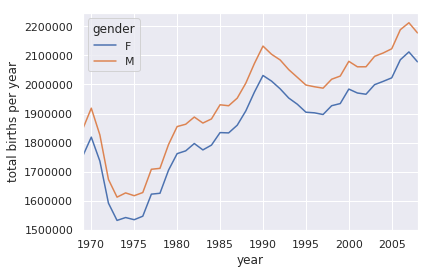

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

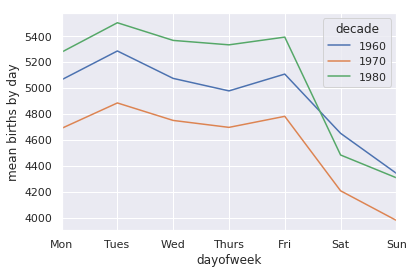

In [0]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
100 * births.month +
births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

#Apparently births are slightly less common on weekends than on weekdays

In [0]:
# births by day of the year
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [0]:
# associate with dummy year 2012
# leap year chosen on purpose
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


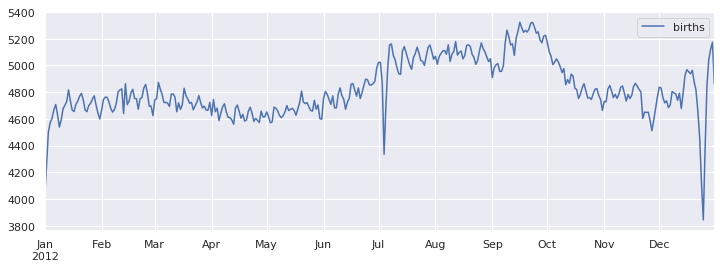

In [0]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);
# blogpost on the effect: https://statmodeling.stat.columbia.edu/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/

#Vectorized String Operations

##Introducing Pandas String Operations

In [0]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [0]:
# strings require looping in numpy
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [0]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
print("ERROR EXPECTED DUE TO MISSING DATA")
[s.capitalize() for s in data]

ERROR EXPECTED DUE TO MISSING DATA


AttributeError: ignored

In [0]:
# Pandas contains vectorized string operations and correctly handles missing data
import pandas as pd
names = pd.Series(data)
print(names, '\n\n')
names.str.capitalize()

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object 




0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

##Pandas String Methods

In [2]:
import numpy as np
import pandas as pd

monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [3]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [4]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [5]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [6]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [7]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [8]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [9]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [10]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [12]:
# indicator variables
# A = "born in America," B = "born in the United Kingdom,"
# C = "likes cheese,"    D = "likes spam"
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [13]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


##Example: Recipe Database

In [14]:
!curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz
!gunzip recipeitems-latest.json.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    20  100    20    0     0    202      0 --:--:-- --:--:-- --:--:--   202
